In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap


/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("IRIS.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data["species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
species_encoder = {"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}
data["species"] = data["species"].map(species_encoder)


In [5]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
data.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Mean Squared Error: 0.03723364456197504
R^2 Score: 0.9467245149351708
RMSE: 0.1929602149718305
Coefficients: [-0.11368098 -0.06458377  0.25261442  0.54938903]
Intercept: 1.2582505124634553


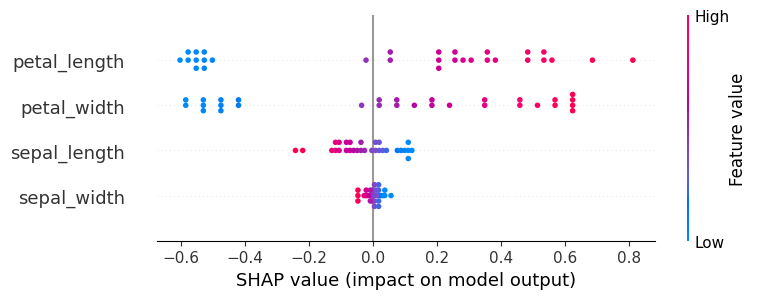

In [8]:


X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'RMSE: {np.sqrt(mse)}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Interpretation with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())


Mean Squared Error: 0.03723364456197504
R^2 Score: 0.9467245149351708
RMSE: 0.1929602149718305
Coefficients: [-0.11368098 -0.06458377  0.25261442  0.54938903]
Intercept: 1.2582505124634553


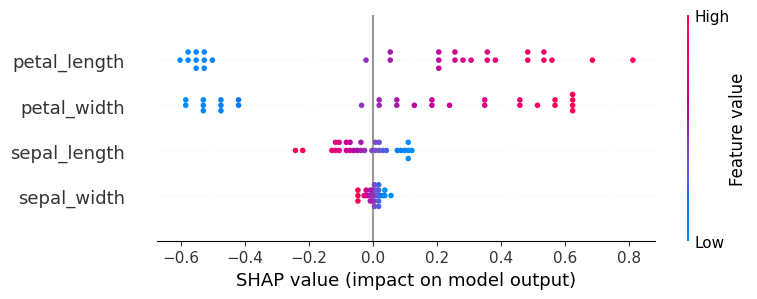

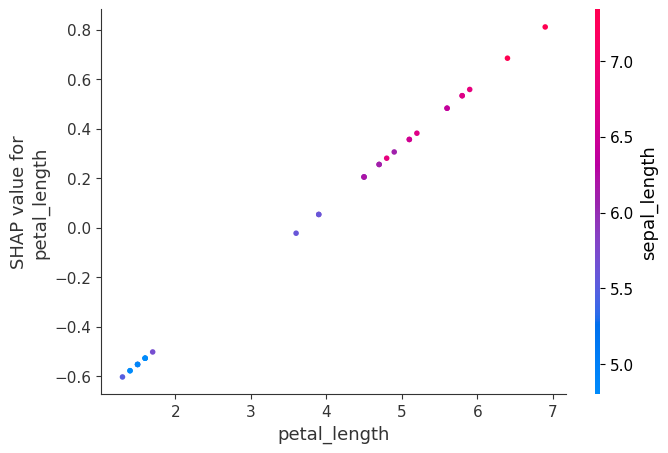

In [18]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'RMSE: {np.sqrt(mse)}')

# Coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Interpretation with SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

# SHAP Dependence Plot
shap.dependence_plot("petal_length", shap_values, X_test)


# shap_values = explainer(X_test)
# # SHAP Force Plot for a single prediction
# shap.initjs()
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

# SHAP Decision Plot for all predictions
# shap.decision_plot(explainer.expected_value[0], shap_values, X_test)
